<a href="https://colab.research.google.com/github/phoungbedji/ProjetMLF/blob/main/parametric_PDEProjet_financeBEN_CLINTON_HOUNGBEDJI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep parametric PDE for option pricing**


# Introduction
In finance and with the race to high frequency trading, computation efficiency can be directly converted to trading profits. The Black–Scholes model can efficiently be used for pricing European vanilla options. For more complicated options like the Barrier option and Basket option which have no simple analytical solution, the Monte Carlo simulation is an effective way to price them. To get an accurate price with a small variance, we need many simulation paths, which is computationally intensive. Other methods, such as based on PDEs or transforms, suffer from $\textbf{the curse of dimensionality}$.

Recently, Deep neural networks were introduced to approximate the option pricing model. They offer efficient approximations with no curse of dimensionality. By trading off compute time for training with inference time for pricing, they achieve additional order-of-magnitude speedups for options pricing compared to the Monte Carlo simulation which makes live exotic option pricing in production a realistic goal. To fully exploit the benefit of DNNs in the PDE context, WUNDERLICH and GLAU propose the deep parametric PDE method to $\textbf{learn the solution for all parameters simultaneously}$.

# Literature Review and Paper's main contributions:
Classical methods for high-dimensional option pricing include different variants of Monte-Carlo methods, Fourier pricing, low-rank approximations and PDE-based solvers.  Monte-Carlo methods lack efficiency, while the other methods suffer from the curse of dimensionality.
Researchers have considered the application of deep neural networks for option pricing to remedy these problems. Although the idea to use neural networks in finance was already researched in the 1990, its applications only thrived in the recent yers. 

$\textbf{This paper presents a method to solve a family of PDEs with a single network training for multi-asset option pricing.}$ It drastically improves computational time for options pricing. In fact, after a one-time offline phase to train the network, the solution for different parameter values can be evaluated in milliseconds.

# The Deep Parametric PDE Method
We consider a parametric parabolic PDE on a compact parameter domain $(0, T) \times \Omega, (\Omega \subset \mathbb{R}^{d}) $ with a smooth boundary.
We recall the equations to be solved for $ u(t,x, \mu) $, where $\mathcal{L}_{x}^{\mu} $ is a differential operator. The general PDE can be written as:

$$
\begin{aligned} \partial_{t} u(t, x ; \mu)+\mathcal{L}_{x}^{\mu} u(t, x ; \mu) &=f(t, x ; \mu), &(t, x) \in \mathcal{Q}=(0, T) \times \Omega \\ u(0, x ; \mu) &=g(x ; \mu), & x \in \Omega \\ u(t, x ; \mu) &=u_{\Sigma}(t, x ; \mu), &(t, x) \in \Sigma=(0, T) \times \partial \Omega \end{aligned}
$$
## The author's idea 💡
In this paper, the authors aim to approximate the solution $u$ by a neural network with the time, state and parameter variables as the input via the minimization of a loss function. After training,the solution of the PDE is given for all times, states and parameter values by evaluating the model. This approach is $\textbf{unsupervised}$, no samples are required we only need to minimise a loss function conviently defined.
## How to choose the loss function?
A suitable approach is based on a least-squares formulation of the PDE. Another integral over the parameter domain is added to account for the parameter-dependency and allow to minimize the loss function on the whole parameter domain and thus provide a solution for all times, states and parameter values.

The loss based on the PDE’s residuals is decomposed in 3 parts: 

* The interior residual (on the interior of the parameter domain)
* The initial residual
* The boundary residual (which will be neglected in this approach for simplifications)

The integrals are numerically evaluated by Monte-Carlo quadrature with $ \textbf{N = 10 000} $ random points.

## Let us consider an example: Multivariate Option Pricing in the Black-Scholes model
Let $u(t, x ; \mu)$ denotes the fair price of an option with d underlyings $S_{\tau}(\mu)=\left(S_{\tau}^{1}(\mu), \ldots, S_{\tau}^{d}(\mu)\right)$ and payoff G:

\begin{aligned} u(t, x ; \mu) &=\operatorname{Price}\left(T-t, e^{x} ; \mu\right) \\ \operatorname{Price}(\tau, s ; \mu) &=e^{-r(T-\tau)} \mathbb{E}\left(G\left(S_{T}(\mu)\right) \mid S_{\tau}(\mu)=s\right) \end{aligned}
The underlynigs dynamics is given by Black-Scholes equation and $\mu$ contains the risk-free rate of return, volatilities and correlations (model parameters ans option parameters).

In the Black-Scholes model, the PDE is homogeneous: $f(t, x ; \mu)=0$ and the differential operator is given by: 
$$\mathcal{L}_{x}^{\mu} u(t, x ; \mu)=r u(t, x ; \mu)-\sum_{i=1}^{d}\left(r-\frac{\sigma_{i}^{2}}{2}\right) \partial_{x_{i}} u(t, x ; \mu)-\sum_{i, j=1}^{d} \frac{\rho_{i j} \sigma_{i} \sigma_{j}}{2} \partial_{x_{i} x_{j}} u(t, x ; \mu)$$
Consequently, the loss function can be written as : 
\begin{array}{l}\mathcal{J}_{\mathrm{interior}}(u) \approx \sum_{i=1}^{N}\left(\partial_{t} u\left(t^{(i)}, x^{(i)} ; \mu^{(i)}\right)+\mathcal{L}_{x}^{\mu} u\left(t^{(i)}, x^{(i)} ; \mu^{(i)}\right)-f\left(t^{(i)}, x^{(i)} ; \mu^{(i)}\right)\right)^{2} / N \\ \mathcal{J}_{\mathrm{initial}}(u) \approx \sum_{i=1}^{N}\left(u\left(0, \hat{x}^{(i)} ; \hat{\mu}^{(i)}\right)-g\left(\hat{x}^{(i)} ; \hat{\mu}^{(i)}\right)\right)^{2} / N \\ \mathcal{J}(u) = \mathcal{J}_{\mathrm{interior}}(u) + \mathcal{J}_{\mathrm{initial}}(u)
\end{array}

for $ N = 10 000$ random points in the parameter domain uniformly distributed.


## Localisation of the PDE 
The option price can be decomposed in two parts:
- No-arbitrage bound : the maximum of zero and the expected payoff of a derivative sharing all specifications of the option to price but the owner is forced to execute at maturity. $\widehat{u}_{\lambda}(t, x ; \mu)$ denotes its smooth approximation with parameter $\lambda$.
- $\textbf{Time value}$ of the option which will be approximated using a Neural Network: $\mu(t, x ; \mu)-\widehat{u}_{\lambda}(t, x ; \mu)$.

## A payoff example to make things concrete : 
The paper takes the example of a European basket call option. 
$\textbf{European basket call options}$ with equal weights and fixed strike price K: 

$$g(x)=G\left(e^{x}\right)=\left(\frac{1}{d} \sum_{i=1}^{d} e^{x_{i}}-K\right)_{+}=\max \left\{0, \frac{1}{d} \sum_{i=1}^{d} e^{x_{i}}-K\right\}$$
A sample code is provided for two assets pricing (github repository: https://github.com/LWunderlich/DeepPDE).

We adapted the code to the pricing of a european call option and a basket option with 3 assets. Later in this notebook and  as an application of the paper, we will comment on the code and present the main results we obtained when pricing a European Basket Call option with 3 assets.
 
 
## Applications? But first, let's understand how the Neural Network is built:
The Neural network architecture used in this paper is the $\textbf{Highway networks}$. This architecture is inspired by $\textbf{Long Short-Term Memory (LSTM) recurrent neural networks}$. It has gating mechanisms that allow the networks to have paths for information to follow across different layers ("information highways").
One advantage of a Highway Network is that it solves or prevents partially the Vanishing gradient problem.

After an initial dense layer, several gated layers are applied and finally combined to a scalar output (localisation). The structure of a gated layer follows the equation:

$$y=H\left(x, W_{H}\right) . T\left(x, W_{T}\right)+x . C\left(x, W_{C}\right)=H\left(x, W_{H}\right) . T\left(x, W_{T}\right)+x \cdot\left(1-T\left(x, W_{T}\right)\right)$$  where $W$  denotes the Weights and $H, C, T$ transform function (multiply the input by the weights and add bias)followed by an activation function(tanh). Adding the localisation to a last dense layer yields the trial functions for the option price. The network parameters are obtained by minimisation of the loss function with respect to the weights of the neural network. This highly non-linear non-convex optimisation problem is solved iteratively by a variant of a gradient-descent method.

In this paper, the neural networks $\textbf{hyper-parameters}$, such as the number of layers and the number of nodes per layer were optimised based on a random search using keras-tuner.
The retained network have 9 layers with 90 nodes each an Adam optimizer and a learning rate (the step-size of the optimiser) of 0.001.








# Application and main results
The authors provide a pre-trained network as used in the article and methods defining the neural network architecture to train one's own model. The neural network is implemented in Tensorflow.

We manipulated the different methods, understood the architecture and adapted the code first to price a basket call option with higher dimension (3 assets).


# Further application : Option sensitivities calculation via the parametric PDE approach (Greeks):
The main contribution of this approach is that with only one training, we have solved the whole family of PDEs.Thus evaluating the network after an infinitesimal change in an input variable, all else being equal provides a good approximation of the derivative.
Therefore, the option price sensitivity to a change in an underlying parameter aka Greeks can be directly derived from the parametric PDE solution by considering the derivative of the output (the neural network) with respect to the input (state variables for instance asset prices and model parameters for instance volatilities and the risk free rate). 
 It's important to mention that the model is initially trained to approximate to solution of the PDE without taking into consideration its derivatives. Therefore, we need to add the PDE verified by the greeks to the loss function we are minimizing for a better approximation. 
Below, we plot the surfaces for commonly used Greeks (Delta, Gamma, Vega and Rho), derived from the neural network solution.


In [2]:
#@title #####Import packages and define model parameters

# import packages and define model parameters 
import numpy as np
import tensorflow as tf
import tensorflow.keras.backend as K

from tensorflow import keras
from scipy.stats import norm
from numpy.polynomial.hermite import hermgauss

import matplotlib.pyplot as plt

import urllib
import os
import itertools
from itertools import product, combinations

np.random.seed(42)
nr_samples_surface_plot = 21
nr_samples_scatter_plot = 1000
nr_samples_error_calculation = 10000

# Model parameters.
s_min_interest = 25
s_max_interest = 150
t_min_interest = 0.5
t_max_interest = 4.

riskfree_rate_min = 0.1
riskfree_rate_max = 0.3
riskfree_rate_eval = 0.2

volatility_min = 0.1
volatility_max = 0.3
volatility1_eval = 0.1
volatility2_eval = 0.3

correlation_min = 0.2
correlation_max = 0.8
correlation_eval = 0.5

strike_price = 100.

#Internal parameters
dimension_state = 2
dimension_parameter = 4
dimension_total = 1 + dimension_state + dimension_parameter

t_min = 0.
t_max = t_max_interest
s_max = strike_price * (1 + 3*volatility_max*t_max)
x_max = np.log(s_max)
x_min = 2*np.log(strike_price) - x_max

normalised_max = 1
normalised_min = -1



We save differents DPDE model in 
"https://github.com/phoungbedji/ProjetMLF/raw/main/".  To avoid time consuming training of DPDE model we set load_model=True. Please , change this macro parameter to false to train the models. 

DBSDE model (at the end) is time consuming. 

In [5]:
#@title #####Load model
# Function to oad model et code from our github repo to local folder. 
#If it is not availabe, download it.
#To train the model set load_model=False
%%time
load_model=True
# Load model from local folder. If it is not availabe, download it.
def load_modelfromGit(Dim=2):

    os.makedirs('model'+str(Dim)+'/variables', exist_ok=True)
    url_base="https://github.com/phoungbedji/ProjetMLF/raw/main/"
    filename = 'model'+str(Dim)+'/saved_model.pb'
    if not os.path.isfile(filename):
        urllib.request.urlretrieve(url_base + filename, filename)
    print(filename)   
    filename = 'model'+str(Dim)+'/variables/variables.data-00000-of-00001'
    if not os.path.isfile(filename):
        urllib.request.urlretrieve(url_base + filename, filename)

    filename = 'model'+str(Dim)+'/variables/variables.index'
    if not os.path.isfile(filename):
        urllib.request.urlretrieve(url_base + filename, filename)

    model = keras.models.load_model('model'+str(Dim))  

    return model 
if load_model:
  model=load_modelfromGit()
#load_CodePy()


model3/saved_model.pb
CPU times: user 1.38 s, sys: 91 ms, total: 1.47 s
Wall time: 2.39 s


In [ ]:
#@title #####Utility functions to transform and normalise raw input (data preprocessing)


def transform_ab_to_cd(x, a, b, c, d): 
    """
    Perform a linear transformation of a scalar from the souce interval
    to the target interval.

    Keyword arguments:
    x -- scalar point(s) to transform
    a, b -- interval to transform from
    c, d -- interval to transform to 
    """
    return c + (x-a) * (d-c) / (b-a)

def transform_to_logprice(x): 
    """ Transform normalised variable to the log-price. """
    return transform_ab_to_cd(x, normalised_min, normalised_max, x_min, x_max)

def transform_to_time(t): 
    """ Transform normalised variable to the time variable. """
    return transform_ab_to_cd(t, normalised_min, normalised_max, t_min, t_max)

def normalise_logprice(x):
    """ Transform log-price to its corresponding normalised variable. """
    return transform_ab_to_cd(x, x_min, x_max, normalised_min, normalised_max)

def normalise_time(t): 
    """ Transform time to its corresponding normalised variable. """
    return transform_ab_to_cd(t, t_min, t_max, normalised_min, normalised_max)


def transform_to_riskfree_rate(mu_1):
    """ Transform normalised variable to the risk-free rate. """
    return transform_ab_to_cd(mu_1, normalised_min, normalised_max,
                                    riskfree_rate_min, riskfree_rate_max)

def transform_to_volatility(mu_2):
    """ Transform normalised variable to the volatility. """
    return transform_ab_to_cd(mu_2, normalised_min, normalised_max,
                                    volatility_min, volatility_max)
    
def transform_to_correlation(mu_3):
    """ Transform normalised variable to the correlation. """
    return transform_ab_to_cd(mu_3, normalised_min, normalised_max,
                                    correlation_min, correlation_max)

def normalise_riskfree_rate(riskfree_rate):
    """ Transform risk-free rate to its corresponding normalised variable. """
    return transform_ab_to_cd(riskfree_rate,
                              riskfree_rate_min, riskfree_rate_max, 
                              normalised_min, normalised_max)
    
def normalise_volatility(volatility):
    """ Transform volatility to its corresponding normalised variable. """
    return transform_ab_to_cd( volatility, volatility_min, volatility_max,
                                            normalised_min, normalised_max)
    
def normalise_correlation(correlation):
    """ Transform correlation to its corresponding normalised variable. """
    return transform_ab_to_cd(correlation, correlation_min, correlation_max,
                                            normalised_min, normalised_max)

t_min_interest_normalised = normalise_time(t_min_interest)
t_max_interest_normalised = normalise_time(t_max_interest)

diff_dx = (normalised_max-normalised_min) / (x_max-x_min) 
diff_dt = (normalised_max-normalised_min) / (t_max-t_min)

riskfree_rate_eval_normalised = normalise_riskfree_rate(riskfree_rate_eval)
volatility1_eval_normalised = normalise_volatility(volatility1_eval)
volatility2_eval_normalised = normalise_volatility(volatility2_eval)
correlation_eval_normalised = normalise_correlation(correlation_eval)

In [ ]:
#@title #####Generate random points of interest
# Generating random points of interest
def get_random_points_of_interest(nr_samples, 
                    t_min_interest=t_min_interest,
                    t_max_interest=t_max_interest,
                    s_min_interest=s_min_interest,
                    s_max_interest=s_max_interest,
                    parameter_min_interest_normalised=normalised_min,
                    parameter_max_interest_normalised=normalised_max):
    """ Get a number of random points within the defined domain of interest. """
    t_sample = np.random.uniform(t_min_interest, t_max_interest, 
                                 [nr_samples, 1])
    t_sample_normalised = normalise_time(t_sample)

    s_sample = np.random.uniform(
        s_min_interest, s_max_interest, [nr_samples, dimension_state])
    s1_sample = s_sample[:, 0:1]
    s2_sample = s_sample[:, 1:2]
    x_sample_normalised = normalise_logprice(np.log(s_sample))

    parameter_sample_normalised = np.random.uniform(
        normalised_min, normalised_max, [nr_samples, dimension_parameter])
    data_normalised = np.concatenate(
        (t_sample_normalised, x_sample_normalised, parameter_sample_normalised),
        axis=1
        )

    riskfree_rate_sample = transform_to_riskfree_rate(
        parameter_sample_normalised[:, 0])
    volatility1_sample = transform_to_volatility(
        parameter_sample_normalised[:, 1])
    volatility2_sample = transform_to_volatility(
        parameter_sample_normalised[:, 2])
    correlation_sample = transform_to_correlation(
        parameter_sample_normalised[:, 3])
    
    return data_normalised, t_sample.reshape(-1), s1_sample.reshape(-1), \
            s2_sample.reshape(-1), riskfree_rate_sample, volatility1_sample, \
            volatility2_sample, correlation_sample


def get_points_for_plot_at_fixed_time(t_fixed=t_max,
                s_min_interest=s_min_interest, s_max_interest=s_max_interest,
                riskfree_rate_fixed=riskfree_rate_eval,
                volatility1_fixed=volatility1_eval,
                volatility2_fixed=volatility2_eval,
                correlation_fixed=correlation_eval,
                n_plot=nr_samples_surface_plot):
    """ Get the spacial and normalised values for surface plots 
    at fixed time and parameter, varying both asset prices. 
    """
    s1_plot = np.linspace(s_min_interest, s_max_interest, n_plot).reshape(-1,1)
    s2_plot = np.linspace(s_min_interest, s_max_interest, n_plot).reshape(-1,1)
    [s1_plot_mesh, s2_plot_mesh] = np.meshgrid(s1_plot, s2_plot, indexing='ij')

    x1_plot_mesh_normalised = normalise_logprice(
        np.log(s1_plot_mesh)).reshape(-1,1)

    x2_plot_mesh_normalised = normalise_logprice(
        np.log(s2_plot_mesh)).reshape(-1,1)

    t_mesh = t_fixed  * np.ones((n_plot**2, 1))
    t_mesh_normalised = normalise_time(t_mesh)

    parameter1_mesh_normalised = (normalise_riskfree_rate(riskfree_rate_fixed) 
                                                      * np.ones((n_plot**2, 1)))
    parameter2_mesh_normalised = (normalise_volatility(volatility1_fixed) 
                                                      * np.ones((n_plot**2, 1)))
    parameter3_mesh_normalised = (normalise_volatility(volatility2_fixed) 
                                                      * np.ones((n_plot**2, 1)))
    parameter4_mesh_normalised = (normalise_correlation(correlation_fixed) 
                                                      * np.ones((n_plot**2, 1)))

    x_plot_normalised = np.concatenate((t_mesh_normalised,
                                        x1_plot_mesh_normalised,
                                        x2_plot_mesh_normalised,
                                        parameter1_mesh_normalised, 
                                        parameter2_mesh_normalised,
                                        parameter3_mesh_normalised, 
                                        parameter4_mesh_normalised), axis=1)

    
    return s1_plot_mesh, s2_plot_mesh, x_plot_normalised

s1_plot_mesh, s2_plot_mesh, x_plot_normalised = get_points_for_plot_at_fixed_time()

In [ ]:
#@title #####Differentiating the neural network solution with respect to input variables (Greeks)
# Differentiating the neural network solution with respect to input variables at final time (Greeks)
h= 10**-6
x_plot_normalised_x1 = np.copy(x_plot_normalised)
x_plot_normalised_x2 = np.copy(x_plot_normalised)
x_plot_normalised_x1h = np.copy(x_plot_normalised)
x_plot_normalised_x2h = np.copy(x_plot_normalised)
x_plot_normalised_r = np.copy(x_plot_normalised)
x_plot_normalised_vol1 = np.copy(x_plot_normalised)
x_plot_normalised_vol2 = np.copy(x_plot_normalised)

x_plot_normalised_x1[:,1] = x_plot_normalised_x1[:,1] +h
x_plot_normalised_x2 [:,2]= x_plot_normalised_x2[:,2] +h
x_plot_normalised_r[:,3] = x_plot_normalised_r[:,3] +h
x_plot_normalised_vol1[:,4] = x_plot_normalised_vol1[:,4] +h
x_plot_normalised_vol2[:,5] = x_plot_normalised_vol2[:,5] +h
x_plot_normalised_x1h[:,1] = x_plot_normalised_x1h[:,1] -h
x_plot_normalised_x2h [:,2]= x_plot_normalised_x2h[:,2] -h


solution = model.predict(x_plot_normalised)

delta1 = ( model.predict(x_plot_normalised_x1)- solution)/h
delta2 = (model.predict(x_plot_normalised_x2)- solution)/h
rho = (model.predict(x_plot_normalised_r) - solution)/h
vega1 = (model.predict(x_plot_normalised_vol1) - solution)/h
vega2 = (model.predict(x_plot_normalised_vol2) - solution)/h
gamma1 = ( model.predict(x_plot_normalised_x1)+ model.predict(x_plot_normalised_x1h)- 2* solution)/h**2
gamma2 = ( model.predict(x_plot_normalised_x2)+ model.predict(x_plot_normalised_x2h)- 2* solution)/h**2




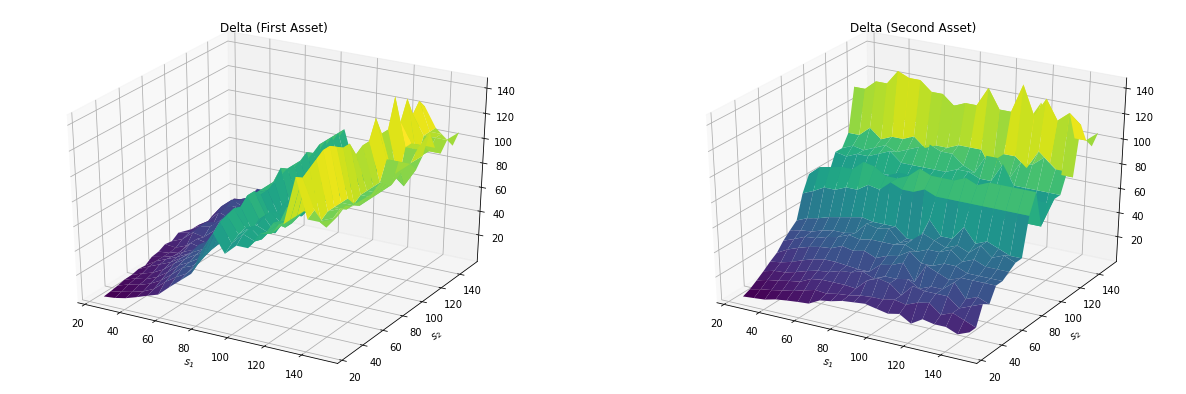

In [ ]:
#@title 
fig = plt.figure(figsize=(21, 7))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(s1_plot_mesh, s2_plot_mesh, delta1.reshape(
    nr_samples_surface_plot, nr_samples_surface_plot), cmap='viridis')
ax.set_title('Delta (First Asset)')
ax.set_xlabel('$s_1$')
ax.set_ylabel('$s_2$')

ax = fig.add_subplot(1, 2, 2, projection='3d')

ax.plot_surface(s1_plot_mesh, s2_plot_mesh, delta2.reshape(
    nr_samples_surface_plot, nr_samples_surface_plot), cmap='viridis')
ax.set_title('Delta (Second Asset)')
ax.set_xlabel('$s_1$')
ax.set_ylabel('$s_2$')
plt.show()

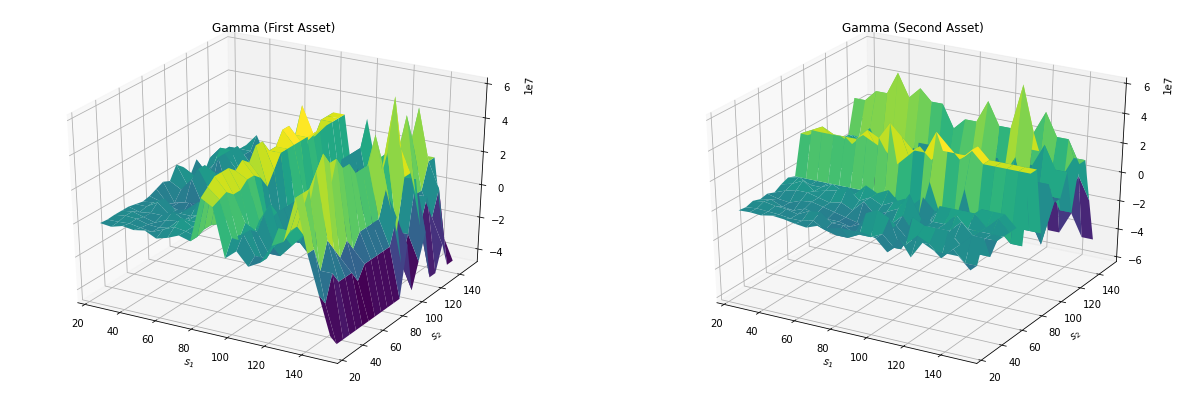

In [ ]:
#@title 
fig = plt.figure(figsize=(21, 7))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(s1_plot_mesh, s2_plot_mesh, gamma1.reshape(
    nr_samples_surface_plot, nr_samples_surface_plot), cmap='viridis')
ax.set_title('Gamma (First Asset)')
ax.set_xlabel('$s_1$')
ax.set_ylabel('$s_2$')

ax = fig.add_subplot(1, 2, 2, projection='3d')

ax.plot_surface(s1_plot_mesh, s2_plot_mesh, gamma2.reshape(
    nr_samples_surface_plot, nr_samples_surface_plot), cmap='viridis')
ax.set_title('Gamma (Second Asset)')
ax.set_xlabel('$s_1$')
ax.set_ylabel('$s_2$')
plt.show()

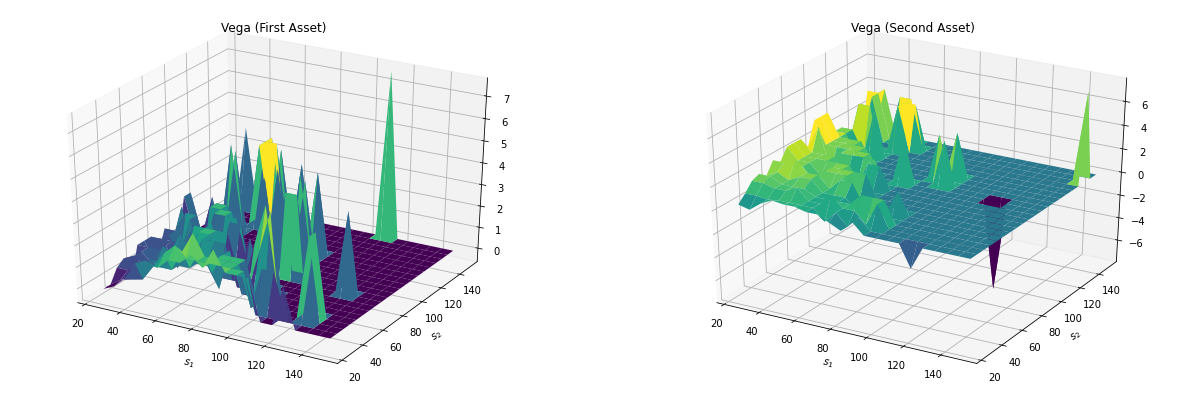

In [ ]:
#@title
fig = plt.figure(figsize=(21, 7))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(s1_plot_mesh, s2_plot_mesh, vega1.reshape(
    nr_samples_surface_plot, nr_samples_surface_plot), cmap='viridis')
ax.set_title('Vega (First Asset)')
ax.set_xlabel('$s_1$')
ax.set_ylabel('$s_2$')

ax = fig.add_subplot(1, 2, 2, projection='3d')

ax.plot_surface(s1_plot_mesh, s2_plot_mesh, vega2.reshape(
    nr_samples_surface_plot, nr_samples_surface_plot), cmap='viridis')
ax.set_title('Vega (Second Asset)')
ax.set_xlabel('$s_1$')
ax.set_ylabel('$s_2$')
plt.show()

Text(0.5, 0, '$s_2$')

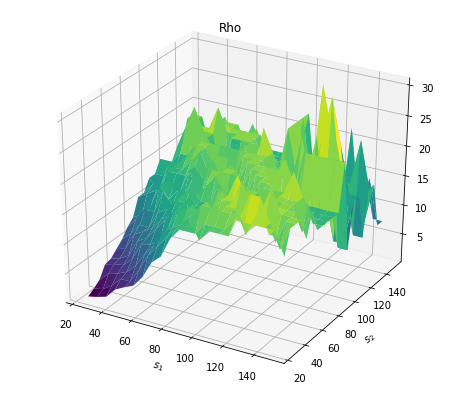

In [ ]:
#@title
fig = plt.figure(figsize=(8, 7))
ax = plt.axes(projection='3d')
ax.plot_surface(s1_plot_mesh, s2_plot_mesh, rho.reshape(
    nr_samples_surface_plot, nr_samples_surface_plot), cmap='viridis')
ax.set_title('Rho')
ax.set_xlabel('$s_1$')
ax.set_ylabel('$s_2$')


For a better approximation, we overrode the method train_step in Keras in order to redefine the loss function taking into account the PDE equation on the considered greeks. In the example below (code) of Delta calculation, we added a supplementary condition by deriving the main PDE with respect to asset prices to improve the derivative approximation  by the neural network. We did not change the localisation. 
Below, the new loss function we defined. Training the model with this loss is computationaly more intensive and yielded numerical problems in gradients calculations, that we unfortunately could not solve.

In [ ]:
#@title Overriding the method train_step to compute greck 
import tensorflow as tf
class DPDEModelGrek(tf.keras.Model):
    """ Create a keras model with the deep param. PDE loss function """

    def train_step(self, data):
        """ Create one optimisation stop based on the deep param. PDE loss function. """
        data_interior, data_initial = data[0]

        riskfree_rate_interior = transform_to_riskfree_rate(
            data_interior[:, 3:4])
        volatility1_interior = transform_to_volatility(data_interior[:, 4:5])
        volatility2_interior = transform_to_volatility(data_interior[:, 5:6])
        correlation_interior = transform_to_correlation(data_interior[:, 6:7])

        x1_initial = transform_to_logprice(data_initial[:, 1:2])
        x2_initial = transform_to_logprice(data_initial[:, 2:3])

        with tf.GradientTape() as tape:
            v_interior = self(data_interior, training=True)  # Forward pass
            v_initial = self(data_initial, training=True)  # Forward pass bdry

            gradient = K.gradients(v_interior, data_interior)[0]

            v_dt = diff_dt * gradient[:, 0:1]
            v_dx1 = diff_dx * gradient[:, 1:2]
            v_dx2 = diff_dx * gradient[:, 2:3]

            grad_v_dx1 = K.gradients(v_dx1, data_interior)[0]
            grad_v_dx2 = K.gradients(v_dx2, data_interior)[0]
            grad_v_dt = K.gradients(v_dt, data_interior)[0]

         

            v_dx1dx1 = diff_dx * grad_v_dx1[:, 1:2]
            v_dx2dx2 = diff_dx * grad_v_dx2[:, 2:3]
            v_dx1dx2 = diff_dx * grad_v_dx1[:, 2:3]
            v_dx2dx1 = diff_dx * grad_v_dx2[:, 1:2]

            grad_v_dx1dx1 = K.gradients(v_dx1dx1, data_interior)[0]
            grad_v_dx2dx2 = K.gradients(v_dx2dx2, data_interior)[0]


            grad_v_dx1dx2 = K.gradients(v_dx1dx2, data_interior)[0]
            grad_v_dx2dx1 = K.gradients(v_dx2dx1, data_interior)[0]
            

            v_dtdx1 = diff_dx * grad_v_dt[:, 1:2]
            v_dtdx2 = diff_dx * grad_v_dt[:, 2:3]

            v_dx1dx1dx1 = diff_dx * grad_v_dx1dx1[:, 1:2]
            v_dx2dx2dx1 = diff_dx * grad_v_dx2dx2[:, 1:2]
            v_dx1dx2dx1 = diff_dx * grad_v_dx1dx2[:, 1:2]
            v_dx2dx1dx1 = diff_dx * grad_v_dx2dx1[:, 1:2]

            v_dx1dx1dx2 = diff_dx * grad_v_dx1dx1[:, 2:3]
            v_dx2dx2dx2 = diff_dx * grad_v_dx2dx2[:, 2:3]
            v_dx1dx2dx2 = diff_dx * grad_v_dx1dx2[:, 2:3]
            v_dx2dx1dx2 = diff_dx * grad_v_dx2dx1[:, 2:3]



            residual_interior = (
                v_dt + riskfree_rate_interior * v_interior 
                - (riskfree_rate_interior - volatility1_interior**2/2) * v_dx1
                - (riskfree_rate_interior - volatility2_interior**2/2) * v_dx2
                - 0.5 * volatility1_interior**2 * v_dx1dx1
                - 0.5 * volatility2_interior**2 * v_dx2dx2 
                - 0.5 * correlation_interior 
                    * volatility1_interior * volatility2_interior * v_dx1dx2 
                - 0.5 * correlation_interior 
                    * volatility2_interior * volatility1_interior * v_dx2dx1
                )
            
            residual_delta1 = (
                v_dtdx1 + riskfree_rate_interior * v_dx1
                -(riskfree_rate_interior - volatility1_interior**2/2) * v_dx1dx1
                -(riskfree_rate_interior - volatility2_interior**2/2) * v_dx2dx1
                - 0.5 * volatility1_interior**2 * v_dx1dx1dx1
                - 0.5 * volatility2_interior**2 * v_dx2dx2dx1 
                - 0.5 * correlation_interior 
                    * volatility1_interior * volatility2_interior * v_dx1dx2dx1 
                - 0.5 * correlation_interior 
                    * volatility2_interior * volatility1_interior * v_dx2dx1dx1
                    )
            residual_delta2 = (
                v_dtdx2 + riskfree_rate_interior * v_dx2
                -(riskfree_rate_interior - volatility1_interior**2/2) * v_dx1dx2
                -(riskfree_rate_interior - volatility2_interior**2/2) * v_dx2dx2
                - 0.5 * volatility1_interior**2 * v_dx1dx1dx2
                - 0.5 * volatility2_interior**2 * v_dx2dx2dx2 
                - 0.5 * correlation_interior 
                    * volatility1_interior * volatility2_interior * v_dx1dx2dx2 
                - 0.5 * correlation_interior 
                    * volatility2_interior * volatility1_interior * v_dx2dx1dx2
                    )
            

            s_mean_initial = 0.5 * (
                tf.math.exp(x1_initial)+tf.math.exp(x2_initial)) 
            payoff_initial = K.maximum(s_mean_initial - strike_price, 0)

            loss_interior = K.mean(K.square(residual_interior))
            loss_initial = K.mean(K.square(v_initial - payoff_initial))
            loss_delta1 = K.mean(K.square(residual_delta1))
            loss_delta2 = K.mean(K.square(residual_delta2))

            loss = loss_initial + loss_interior
            new_loss = loss_initial + loss_interior + loss_delta1 + loss_delta2 


        # Compute gradients
        trainable_vars = self.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)

        # Update weights
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))

        return {"loss": loss, 
                "loss initial": loss_initial, 
                "loss interior": loss_interior,
               "new loss": new_loss,
                "loss_delta1": loss_delta1,
                "loss_delta2": loss_delta2}

#Application for a basket call option with 3 Assets
In this part, we try to implement the author's deep pde method for a basket call option basket for 3 assets.

In [ ]:
#@title Define model parameter
load_model = True
nr_samples_surface_plot = 21
nr_samples_scatter_plot = 1000
nr_samples_error_calculation = 1000



riskfree_rate_eval = 0.2


volatility1_eval = 0.1
volatility2_eval = 0.2
volatility3_eval = 0.1


correlation12_eval = 0.2
correlation13_eval = 0
correlation23_eval = 0.5

strike_price = 100

nr_nodes_per_layer = 90
initial_learning_rate = 0.001
localisation_parameter = 1/10.

n_train = 10000
nr_epochs = 1000

dimension_state = 3
dimension_parameter = 7
dimension_total = 1 + dimension_state + dimension_parameter

t_min = 0.
t_max = t_max_interest
s_max = strike_price * (1 + 3*volatility_max*t_max)
x_max = np.log(s_max)
x_min = 2*np.log(strike_price) - x_max

normalised_max = 1
normalised_min = -1
riskfree_rate_eval_normalised = normalise_riskfree_rate(riskfree_rate_eval)
volatility1_eval_normalised = normalise_volatility(volatility1_eval)
volatility2_eval_normalised = normalise_volatility(volatility2_eval)
volatility3_eval_normalised = normalise_volatility(volatility3_eval)
correlation12_eval_normalised = normalise_correlation(correlation12_eval)
correlation13_eval_normalised = normalise_correlation(correlation13_eval)
correlation23_eval_normalised = normalise_correlation(correlation23_eval)

In [ ]:
#@title Cronstruct Network
import numpy as np
import tensorflow as tf

class HighwayLayer(tf.keras.layers.Layer):
    """ Define one layer of the highway network. """

    def __init__(self, units, original_input):
        """ Construct the layer by creating all weights and biases in keras. """ 
        super(HighwayLayer, self).__init__()
        self.units = units

        # create all weights and biases
        self.Uz = self.add_weight("Uz", shape=(original_input, self.units),
                                    initializer="random_normal", trainable=True)
        self.Ug = self.add_weight("Ug", shape=(original_input, self.units),
                                    initializer="random_normal", trainable=True)
        self.Ur = self.add_weight("Ur", shape=(original_input, self.units),
                                    initializer="random_normal", trainable=True)
        self.Uh = self.add_weight("Uh", shape=(original_input, self.units),
                                    initializer="random_normal", trainable=True)
        
        self.Wz = self.add_weight("Wz", shape=(self.units, self.units),
                                    initializer="random_normal", trainable=True)
        self.Wg = self.add_weight("Wg", shape=(self.units, self.units),
                                    initializer="random_normal", trainable=True)
        self.Wr = self.add_weight("Wr", shape=(self.units, self.units),
                                    initializer="random_normal", trainable=True)
        self.Wh = self.add_weight("Wh", shape=(self.units, self.units),
                                    initializer="random_normal", trainable=True)
        
        self.bz = self.add_weight("bz", shape=(self.units,), 
                                  initializer="random_normal", trainable=True)
        self.bg = self.add_weight("bg", shape=(self.units,), 
                                  initializer="random_normal", trainable=True)
        self.br = self.add_weight("br", shape=(self.units,), 
                                  initializer="random_normal", trainable=True)
        self.bh = self.add_weight("bh", shape=(self.units,), 
                                  initializer="random_normal", trainable=True)

    def call(self, input_combined):
        """ Returns the result of the layer calculation.
        
        Keyord arguments:
        input_combined -- Dictionary containing the original input of 
        the neural network as 'original_variable' and 
        the output of the previous layer as 'previous layer'.
        """
        previous_layer = input_combined['previous_layer']
        original_variable = input_combined['original_variable']

        # Evaluate one layer using the weights created by the constructor
        Z = tf.keras.activations.tanh(
            tf.matmul(original_variable, self.Uz)
            + tf.matmul(previous_layer,self.Wz) 
            + self.bz)
        
        G = tf.keras.activations.tanh(
            tf.matmul(original_variable, self.Ug) 
            + tf.matmul(previous_layer,self.Wg) 
            + self.bg)
        
        R = tf.keras.activations.tanh(
            tf.matmul(original_variable, self.Ur) 
            + tf.matmul(previous_layer,self.Wr) 
            + self.br)
      
        SR = tf.multiply(previous_layer, R)

        H = tf.keras.activations.tanh(
            tf.matmul(original_variable, self.Uh) 
            + tf.matmul(SR, self.Wh) 
            + self.bh)
        
        one_minus_G = tf.ones_like(G) - G

        return tf.multiply(one_minus_G, H) + tf.multiply(Z, previous_layer)
    

       
def create_network(inputs):
    """ Creates the neural network by creating three highway layers and an 
    output layer. Returns the output of these layers as a tensorflow variable.

    Keyword arguments:
    inputs -- Tensorflow variable of the input layer
    """
    layer0 = keras.layers.Dense(nr_nodes_per_layer, activation="tanh")

    layer1 = HighwayLayer(units=nr_nodes_per_layer,
                          original_input=dimension_total)
    layer2 = HighwayLayer(units=nr_nodes_per_layer,
                          original_input=dimension_total)
    layer3 = HighwayLayer(units=nr_nodes_per_layer,
                          original_input=dimension_total)
    
    last_layer = keras.layers.Dense(1)

    outputs_layer0 = layer0(inputs)
    outputs_layer1 = layer1({'previous_layer': outputs_layer0, 
                             'original_variable': inputs})
    outputs_layer2 = layer2({'previous_layer': outputs_layer1, 
                             'original_variable': inputs})
    outputs_layer3 = layer3({'previous_layer': outputs_layer2, 
                             'original_variable': inputs})

    outputs_dnn = last_layer(outputs_layer3)
    
    inputs_t_normalised = inputs[:, 0:1]
    inputs_x1_normalised = inputs[:, 1:2]
    inputs_x2_normalised = inputs[:, 2:3]
    inputs_x3_normalised = inputs[:, 3:4]
    inputs_p1_normalised = inputs[:, 4:5]
    
    inputs_t = transform_to_time(inputs_t_normalised)
    inputs_x1 = transform_to_logprice(inputs_x1_normalised)
    inputs_x2 = transform_to_logprice(inputs_x2_normalised)
    inputs_x3 = transform_to_logprice(inputs_x3_normalised)
    inputs_s_mean = (tf.math.exp(inputs_x1) + tf.math.exp(inputs_x2) +tf.math.exp(inputs_x3))/3.
    riskfree_rate = transform_to_riskfree_rate(inputs_p1_normalised)

    localisation = tf.math.log(1+tf.math.exp(localisation_parameter * (
            inputs_s_mean - strike_price * tf.exp( - riskfree_rate * inputs_t)
              )))/localisation_parameter

    return outputs_dnn + localisation
    

In [ ]:
#@title Deep Generator
class DPDEGenerator(keras.utils.Sequence):
    """ Create batches of random points for the network training. """

    def __init__(self, batch_size):
        """ Initialise the generator by saving the batch size. """
        self.batch_size = batch_size
      
    def __len__(self):
        """ Describes the number of points to create """
        return self.batch_size
    
    def __getitem__(self, idx):
        """ Get one batch of random points in the interior of the domain to 
        train the PDE residual and with initial time to train the initial value.
        """
        data_train_interior = np.random.uniform(
            normalised_min, normalised_max, [self.batch_size, dimension_total]) 
        

        t_train_initial = normalised_min * np.ones((self.batch_size, 1))
        s_and_p_train_initial = np.random.uniform(
            normalised_min, normalised_max,
            [self.batch_size, dimension_state + dimension_parameter])
        
        data_train_initial = np.concatenate(
            (t_train_initial, s_and_p_train_initial), axis=1)

        return [data_train_interior, data_train_initial]

For a basket call option with 3 assets, the residual of the PDE is wittren as :

$\mathcal{J}_{\rm{int}}(u) = 
\sum_{i=1}^N
\left(\partial_t u(t^i, x^i, \mu^i) + 
  r  u 
  -   \left(r-\frac{\sigma_1^2}{2}\right)\partial_{x_1} u (t^i, x^i, \mu^i)
  - \left(r-\frac{\sigma_2^2}{2}\right)\partial_{x_2} u (t^i, x^i, \mu^i)
  - \left(r-\frac{\sigma_3^2}{2}\right)\partial_{x_3} u (t^i, x^i, \mu^i)
  -  \frac{\sigma_1^2}{2}  \, \partial_{x_1x_1} u  (t^i, x^i, \mu^i)
  - \frac{\sigma_2^2}{2}  \, \partial_{x_2x_2} u (t^i, x^i, \mu^i)
  - \frac{\sigma_3^2}{2}  \, \partial_{x_3x_3} u (t^i, x^i, \mu^i)  
  -  \rho_{12} \sigma_1 \sigma_2 \, \partial_{x_1x_2} u(t^i, x^i, \mu^i)
  -  \rho_{13} \sigma_1 \sigma_3 \, \partial_{x_1x_3} u(t^i, x^i, \mu^i)
  -  \rho_{23} \sigma_2 \sigma_3 \, \partial_{x_2x_3} u(t^i, x^i, \mu^i) \right)^2
$

and the mean-squared error of the initial condition:

$
\mathcal{J}_{\rm{ic}}(u) =\sum_{i=1}^N \left(u(0, \hat x^i, \hat \mu^i) -  \max(0, (e^{\hat x_1^i} + e^{\hat x_2^i} + e^{\hat x_3^i})/3 - K)\right)^2.
$

In [ ]:
#@title Overriding the method train_step in Keras for 3 assets
class DPDEModel(keras.Model):
    """ Create a keras model with the deep param. PDE loss function """

    def train_step(self, data):
        """ Create one optimisation stop based on the deep param. PDE loss function. """
        data_interior, data_initial = data[0]

        riskfree_rate_interior = transform_to_riskfree_rate(
            data_interior[:, 4:5])
        volatility1_interior = transform_to_volatility(data_interior[:, 5:6])
        volatility2_interior = transform_to_volatility(data_interior[:, 6:7])
        volatility3_interior = transform_to_volatility(data_interior[:, 7:8])
        correlation12_interior = transform_to_correlation(data_interior[:, 8:9])
        correlation13_interior = transform_to_correlation(data_interior[:, 9:10])
        correlation23_interior = transform_to_correlation(data_interior[:, 10:11])

        x1_initial = transform_to_logprice(data_initial[:, 1:2])
        x2_initial = transform_to_logprice(data_initial[:, 2:3])
        x3_initial = transform_to_logprice(data_initial[:, 3:4])

        with tf.GradientTape() as tape:
            v_interior = self(data_interior, training=True)  # Forward pass
            v_initial = self(data_initial, training=True)  # Forward pass bdry

            gradient = K.gradients(v_interior, data_interior)[0]

            v_dt = diff_dt * gradient[:, 0:1]
            v_dx1 = diff_dx * gradient[:, 1:2]
            v_dx2 = diff_dx * gradient[:, 2:3]
            v_dx3 = diff_dx * gradient[:, 3:4]

            grad_v_dx1 = K.gradients(v_dx1, data_interior)[0]
            grad_v_dx2 = K.gradients(v_dx2, data_interior)[0]
            grad_v_dx3 = K.gradients(v_dx3, data_interior)[0]

            v_dx1dx1 = diff_dx * grad_v_dx1[:, 1:2]
            v_dx2dx2 = diff_dx * grad_v_dx2[:, 2:3]
            v_dx3dx3 = diff_dx * grad_v_dx3[:, 3:4]
            v_dx1dx2 = diff_dx * grad_v_dx1[:, 2:3]
            v_dx2dx1 = diff_dx * grad_v_dx2[:, 1:2]
            v_dx1dx3 = diff_dx * grad_v_dx1[:, 3:4]
            v_dx3dx1 = diff_dx * grad_v_dx3[:, 1:2]
            v_dx2dx3 = diff_dx * grad_v_dx2[:, 3:4]
            v_dx3dx2 = diff_dx * grad_v_dx3[:, 2:3]

            residual_interior = (
                v_dt + riskfree_rate_interior * v_interior 
                - (riskfree_rate_interior - volatility1_interior**2/2) * v_dx1
                - (riskfree_rate_interior - volatility2_interior**2/2) * v_dx2
                - (riskfree_rate_interior - volatility3_interior**2/2) * v_dx3
                - 0.5 * volatility1_interior**2 * v_dx1dx1
                - 0.5 * volatility2_interior**2 * v_dx2dx2 
                - 0.5 * volatility3_interior**2 * v_dx3dx3 
                - 0.5 * correlation12_interior 
                    * volatility1_interior * volatility2_interior * v_dx1dx2 
                - 0.5 * correlation12_interior 
                    * volatility2_interior * volatility1_interior * v_dx2dx1
                - 0.5 * correlation13_interior 
                    * volatility1_interior * volatility3_interior * v_dx1dx3
                - 0.5 * correlation13_interior 
                    * volatility3_interior * volatility1_interior * v_dx3dx1                                         
                - 0.5 * correlation23_interior 
                    * volatility2_interior * volatility3_interior * v_dx2dx3 
                - 0.5 * correlation23_interior 
                    * volatility3_interior * volatility2_interior * v_dx3dx2                   
                )

            s_mean_initial = (
                tf.math.exp(x1_initial)+tf.math.exp(x2_initial)+tf.math.exp(x3_initial)) /3
            payoff_initial = K.maximum(s_mean_initial - strike_price, 0)

            loss_interior = K.mean(K.square(residual_interior))
            loss_initial = K.mean(K.square(v_initial - payoff_initial))
            
            loss = loss_initial + loss_interior

        # Compute gradients
        trainable_vars = self.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)

        # Update weights
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))

        return {"loss": loss, 
                "loss initial": loss_initial, 
                "loss interior": loss_interior}

In [ ]:
#@title Train or load model
%%time
if load_model:
   model=load_modelfromGit(Dim=3)
else:
    # Create and train model from scratch. 
    inputs = keras.Input(shape=(dimension_total,))
    outputs = create_network(inputs)
    model = DPDEModel(inputs=inputs, outputs=outputs)
    batch_generator = DPDEGenerator(n_train)
    model.compile(optimizer=tf.keras.optimizers.Adam(initial_learning_rate))
    callback = tf.keras.callbacks.EarlyStopping(
        'loss', patience=50, restore_best_weights=True)
    
    model.fit(x=batch_generator, epochs=nr_epochs, steps_per_epoch=10,
                          callbacks=[callback])

modelDPE3/saved_model.pb
CPU times: user 1.26 s, sys: 73.6 ms, total: 1.34 s
Wall time: 1.31 s


In [ ]:
#@title save model 
if load_model==False:
  model.save('modelDPE3')

The option price is evaluated by integrating a smoothened payoff, as developed in C. Bayer[2018]. The option price $d$ dimensional problem is split in a one-dimensional and a smooth $(d-1)$ -dimensional problem. The first part can be solved precisely and the second part is solved using Gauß-Hermite quadrature.

The covariance matrix is decomposed as in [C. Bayer[2018], Lemma 3.1] yields $\lambda_{i}$ and $\left(v_{i, j}\right)_{i j}$, such that for independent $Y_{i} \in \mathcal{N}\left(0, \lambda_{i}^{2}\right)$ the stochastic process of the logarithmic prices is $\log \left(S_{T}^{i}(\mu)\right)=x_{i}+\left(r-\sigma_{i}^{2} / 2\right) t+Y_{1}+\sum_{j=2}^{d} v_{i, j} Y_{j}$, with $x_{i}$ the
logarithmic asset price at time-to-maturity $t$. Solving a conditional expectation for $Y_{1}$ given $Y_{2}, \ldots, Y_{d}$ first, yields the option price as a $(d-1)$ -dimensional problem with a smooth payoff function:
$$
c(t, x ; \mu)=\mathbb{E}\left(\mathrm{BS}\left(1, h\left(Y_{2}, \ldots, Y_{d}\right), 0, \lambda_{1}, e^{-r t} K\right)\right)
$$
where $h\left(Y_{2}, \ldots, Y_{d}\right)=\frac{1}{d} \sum_{i=1}^{d} e^{x_{i}-\sigma^{2} t / 2} e^{\sum_{j-2}^{d} v_{i, j} Y_{j}} .$

Here we used Gauß-Hermite quadrature as proposed in C. Potz[2020] as a reference pricer to validate our model.

In [ ]:
#@title Exact solution
def decompose_covariance_matrix(t, volatility1, volatility2, volatility3, correlation12, correlation13, correlation23):
    """ Decompose covariance matrix as in Lemma 3.1 of Bayer et. al (2018). """
    M = np.matrix([[volatility1**2, correlation12*volatility1*volatility2, correlation13*volatility1*volatility3],
                   [correlation12*volatility1*volatility2, volatility2**2, correlation23*volatility2*volatility3],
                  [correlation13*volatility1*volatility3, correlation23*volatility2*volatility3, volatility3**2]])
    n = M.shape[0]
    M_inv = np.linalg.inv(M)
    v = np.repeat(1,n)[np.newaxis]
    x = np.dot(v.T,v)/np.dot(np.dot(v, M_inv), v.T)
    M1 = M-x
    res = np.linalg.svd(M1)
    d = t*np.append(x[0,0],res[1][:-1]).flatten()
    v_t = - np.array(res[2][0,:]).flatten()
    return d, v_t

def one_dimensional_exact_solution(
        t, s, riskfree_rate, volatility, strike_price):
    """ Standard Black-Scholes formula """

    d1 = (1 / (volatility*np.sqrt(t))) * (
            np.log(s/strike_price) 
            + (riskfree_rate + volatility**2/2.) * t
        )
    d2 = d1 - volatility*np.sqrt(t)
    return (norm.cdf(d1) * s 
            - norm.cdf(d2) * strike_price * np.exp(-riskfree_rate*t))

def exact_solution(
    t, s1, s2, s3, riskfree_rate, volatility1, volatility2, volatility3, correlation12, correlation13, correlation23):
    """ Compute the option price of a European basket call option. """
    if t == 0:
        return np.maximum((s1+s2+s3)/3 - strike_price, 0)

    d, v = decompose_covariance_matrix(
        t, volatility1, volatility2, volatility3, correlation12, correlation13,correlation23)
    
    beta = [s1 * np.exp(-0.5*t*volatility1**2)/3,
            s2 * np.exp(-0.5*t*volatility2**2)/3, 
            s3 * np.exp(-0.5*t*volatility3**2)/3]
    integration_points, integration_weights = hermgauss(33)

    # Transform points and weights
    integration_points = np.sqrt(2*d[1]) * integration_points.reshape(-1, 1)
    integration_weights = integration_weights.reshape(1, -1) / np.sqrt(np.pi)

    h_z = (beta[0] * np.exp(v[0]*integration_points)
           + beta[1] * np.exp(v[1]*integration_points)
           +beta[2] * np.exp(v[2]*integration_points))

    evaluation_at_integration_points = one_dimensional_exact_solution(
        t=1, s=h_z * np.exp(0.5*d[0]), 
        strike_price=np.exp(-riskfree_rate * t) * strike_price, 
        volatility=np.sqrt(d[0]), riskfree_rate=0.
        )
    
    solution = np.matmul(integration_weights, evaluation_at_integration_points)
    
    return solution[0, 0]
    
def localisation(t, s1, s2, s3, riskfree_rate=riskfree_rate_eval):
    """ Return the value of the localisation used in the network. """
    return 1/localisation_parameter * np.log(1 +
                    np.exp(localisation_parameter * (
                        (s1+s2+s3)/3 - np.exp(-riskfree_rate*t)*strike_price))
                    )

In [ ]:
#@title Generate random points of interest
def get_random_points_of_interest(nr_samples, 
                    t_min_interest=t_min_interest,
                    t_max_interest=t_max_interest,
                    s_min_interest=s_min_interest,
                    s_max_interest=s_max_interest,
                    parameter_min_interest_normalised=normalised_min,
                    parameter_max_interest_normalised=normalised_max):
    """ Get a number of random points within the defined domain of interest. """
    t_sample = np.random.uniform(t_min_interest, t_max_interest, 
                                 [nr_samples, 1])
    t_sample_normalised = normalise_time(t_sample)

    s_sample = np.random.uniform(
        s_min_interest, s_max_interest, [nr_samples, dimension_state])
    s1_sample = s_sample[:, 0:1]
    s2_sample = s_sample[:, 1:2]
    s3_sample = s_sample[:, 2:3]
    x_sample_normalised = normalise_logprice(np.log(s_sample))

    parameter_sample_normalised = np.random.uniform(
        normalised_min, normalised_max, [nr_samples, dimension_parameter])
    data_normalised = np.concatenate(
        (t_sample_normalised, x_sample_normalised, parameter_sample_normalised),
        axis=1
        )

    riskfree_rate_sample = transform_to_riskfree_rate(
        parameter_sample_normalised[:, 0])
    volatility1_sample = transform_to_volatility(
        parameter_sample_normalised[:, 1])
    volatility2_sample = transform_to_volatility(
        parameter_sample_normalised[:, 2])
    volatility3_sample = transform_to_volatility(
        parameter_sample_normalised[:, 3])
    correlation12_sample = transform_to_correlation(
        parameter_sample_normalised[:, 4])
    correlation13_sample = transform_to_correlation(
        parameter_sample_normalised[:, 5])
    correlation23_sample = transform_to_correlation(
        parameter_sample_normalised[:, 6])
    
    return data_normalised, t_sample.reshape(-1), s1_sample.reshape(-1), \
            s2_sample.reshape(-1), s3_sample.reshape(-1), riskfree_rate_sample, volatility1_sample, \
            volatility2_sample, volatility3_sample, correlation12_sample, correlation13_sample, correlation23_sample


def get_points_for_plot_at_fixed_time(t_fixed=t_max,
                s_min_interest=s_min_interest, s_max_interest=s_max_interest,
                riskfree_rate_fixed=riskfree_rate_eval,
                volatility1_fixed=volatility1_eval,
                volatility2_fixed=volatility2_eval,
                volatility3_fixed=volatility3_eval,
                correlation12_fixed=correlation12_eval,
                correlation13_fixed=correlation13_eval,
                correlation23_fixed=correlation23_eval,
                n_plot=nr_samples_surface_plot):
    """ Get the spacial and normalised values for surface plots 
    at fixed time and parameter, varying both asset prices. 
    """
    s1_plot = np.linspace(s_min_interest, s_max_interest, n_plot).reshape(-1,1)
    s2_plot = np.linspace(s_min_interest, s_max_interest, n_plot).reshape(-1,1)
    s3_plot = np.linspace(s_min_interest, s_max_interest, n_plot).reshape(-1,1)
    [s1_plot_mesh, s2_plot_mesh, s3_plot_mesh] = np.meshgrid(s1_plot, s2_plot, s3_plot, indexing='ij')

    x1_plot_mesh_normalised = normalise_logprice(
        np.log(s1_plot_mesh)).reshape(-1,1)

    x2_plot_mesh_normalised = normalise_logprice(
        np.log(s2_plot_mesh)).reshape(-1,1)
    x3_plot_mesh_normalised = normalise_logprice(
        np.log(s3_plot_mesh)).reshape(-1,1)

    t_mesh = t_fixed  * np.ones((n_plot**3, 1))
    t_mesh_normalised = normalise_time(t_mesh)

    parameter1_mesh_normalised = (normalise_riskfree_rate(riskfree_rate_fixed) 
                                                      * np.ones((n_plot**3, 1)))
    parameter2_mesh_normalised = (normalise_volatility(volatility1_fixed) 
                                                      * np.ones((n_plot**3, 1)))
    parameter3_mesh_normalised = (normalise_volatility(volatility2_fixed) 
                                                      * np.ones((n_plot**3, 1)))
    parameter4_mesh_normalised = (normalise_volatility(volatility3_fixed) 
                                                      * np.ones((n_plot**3, 1)))
    parameter5_mesh_normalised = (normalise_correlation(correlation12_fixed) 
                                                      * np.ones((n_plot**3, 1)))
    parameter6_mesh_normalised = (normalise_correlation(correlation13_fixed) 
                                                      * np.ones((n_plot**3, 1)))
    parameter7_mesh_normalised = (normalise_correlation(correlation23_fixed) 
                                                      * np.ones((n_plot**3, 1)))

    x_plot_normalised = np.concatenate((t_mesh_normalised,
                                        x1_plot_mesh_normalised,
                                        x2_plot_mesh_normalised,
                                        x3_plot_mesh_normalised,
                                        parameter1_mesh_normalised, 
                                        parameter2_mesh_normalised,
                                        parameter3_mesh_normalised, 
                                        parameter4_mesh_normalised,
                                        parameter5_mesh_normalised,
                                        parameter5_mesh_normalised,
                                        parameter6_mesh_normalised,
                                        ), axis=1)

    
    return s1_plot_mesh, s2_plot_mesh, s3_plot_mesh, x_plot_normalised


s1_plot_mesh, s2_plot_mesh, s3_plot_mesh, x_plot_normalised = \
    get_points_for_plot_at_fixed_time()

In [ ]:
#@title Model evaluation
DPDE_solution = model.predict(x_plot_normalised).reshape(
    nr_samples_surface_plot, nr_samples_surface_plot,nr_samples_surface_plot)

exact_solution_evaluated = [exact_solution(t=t_max, s1=s1[0], s2=s2[0], s3= s3[0],
                                riskfree_rate=riskfree_rate_eval, 
                                volatility1=volatility1_eval, 
                                volatility2=volatility2_eval,
                                volatility3=volatility3_eval,
                                correlation12=correlation12_eval,
                                correlation13 = correlation13_eval,
                                correlation23=correlation23_eval)
                  for s1, s2, s3 in zip(
                      s1_plot_mesh.reshape(-1, 1), s2_plot_mesh.reshape(-1, 1),s3_plot_mesh.reshape(-1, 1))

                  
                  ]
exact_solution_evaluated = np.array(exact_solution_evaluated)
exact_solution_evaluated = exact_solution_evaluated.reshape(
    nr_samples_surface_plot, nr_samples_surface_plot, nr_samples_surface_plot)

localisation_plot = localisation(4., s1_plot_mesh, s2_plot_mesh, s3_plot_mesh, riskfree_rate_eval)

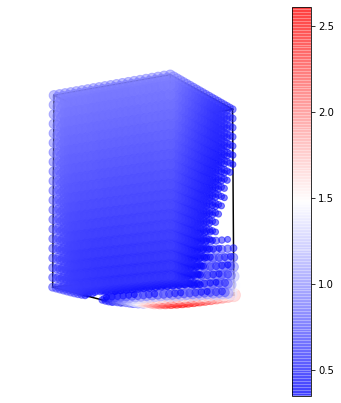

In [ ]:
#@title Pricing error
error = np.abs(DPDE_solution - exact_solution_evaluated)
a = 0.35
error2 = np.where(error<a, np.nan, error)
idx = np.where(~np.isnan(error2))
fig = plt.figure()
fig.subplots_adjust(bottom=-0.15,top=1.2)
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(s1_plot_mesh[idx], s2_plot_mesh[idx], s3_plot_mesh[idx], c=error2[idx].flatten(),s=100 * error2[idx], edgecolor="face", alpha=0.5, marker="o",cmap='bwr',linewidth=1)
fig.colorbar(img)
fig.patch.set_visible(False)
ax.axis('off')
r = [s_min_interest, s_max_interest]
for s, e in combinations(np.array(list(product(r, r, r))), 2):
    if np.sum(np.abs(s-e)) == r[1]-r[0]:
        ax.plot3D(*zip(s, e), color="black")

ax.view_init(-9, 30)
plt.show()

For the graphical representation, we consider three-dimensional plots, varying each of the asset prices at final time and for fixed parameter values. The graph above shows the pricing error in the model, for most of the domain the pricing error is  more than 0.35. On the other hand, we observe high values of the error (compared to the 2-asset model) that exceed 1. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in sqrt


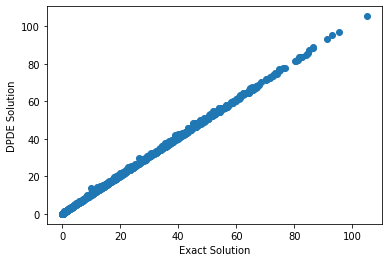

In [ ]:
#@title Test 
data_samples, t_samples, s1_samples, s2_samples, s3_samples, riskfree_rate_samples, \
  volatility1_samples, volatility2_samples, volatility3_samples, correlation12_samples, correlation13_samples, correlation23_samples = \
              get_random_points_of_interest(nr_samples_scatter_plot)

DPDE_solution = model.predict(data_samples)

exact_solution_evaluated = [exact_solution(t=t, s1=s1, s2=s2,s3=s3,
                                  riskfree_rate=riskfree_rate,
                                  volatility1=volatility1,
                                  volatility2=volatility2,
                                  volatility3=volatility3,
                                  correlation12=correlation12,
                                  correlation13=correlation13,
                                  correlation23=correlation23
                                  ) 
                  for t, s1, s2, s3, riskfree_rate, volatility1, volatility2, volatility3,
                      correlation12, correlation13, correlation23 
                  in zip(t_samples, s1_samples, s2_samples, s3_samples, riskfree_rate_samples, 
                          volatility1_samples, volatility2_samples, volatility3_samples,
                          correlation12_samples, correlation13_samples, correlation23_samples)]

exact_solution_evaluated = np.array(exact_solution_evaluated).reshape(-1,1)

plt.scatter(exact_solution_evaluated, DPDE_solution)
plt.xlabel('Exact Solution')
plt.ylabel('DPDE Solution')
plt.show()

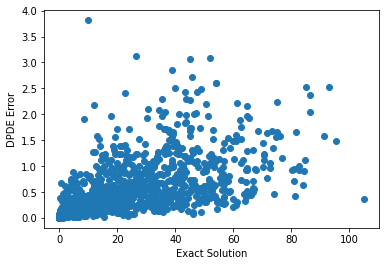

In [ ]:
#@title  DPDE vs Exac_Solution
plt.scatter(exact_solution_evaluated, 
            np.abs(exact_solution_evaluated - DPDE_solution))
plt.xlabel('Exact Solution')
plt.ylabel('DPDE Error')
plt.show()

To test the quality of the model, we consider 1 000 random points from the whole domain of interest. These points have different time, state and parameter values, but with the deep parametric PDE method the option prices are quickly evaluated using a single neural network.The figure above shows the value of the absolute error as a function of the exact solution. Most absolute errors remain below 0.7. Isolated points can be seen with larger errors of up to 0.9.

In [ ]:
#@title DPDDE_solution_evaluated Vs Exact_solution_evaluated
print('Estimated MSE Error:')
print(np.sqrt(np.mean(np.square(exact_solution_evaluated -DPDE_solution))))

print('Relative Error to L2 Norm in %:')
print(np.sqrt(np.mean(np.square(exact_solution_evaluated -DPDE_solution))) 
        / np.sqrt(np.mean(np.square(exact_solution_evaluated)))*100)

print('Maximal Error:')
print(np.max(exact_solution_evaluated - DPDE_solution))

Estimated MSE Error:
0.790009262286553
Relative Error to L2 Norm in %:
2.4587130341546053
Maximal Error:
0.09580488520485142


# Benchmark with Deep BSDE Solver 



In order to compare the algorithmic solution proposed in the paper with other known solutions, we have developed the BSDE algorithm (BSDE article).  The codes can be found in BSDESolver.py . 


The latter is first introduced in \cite{E_2017} and it can solve
 FBSDE using numerical schemes and Monte Carlo method.
 
 
 First let us consider the following forward-backward stochastic differential equation:
 
$$
X_{t}=x+\int_{0}^{t} b\left(s, X_{s}\right) \mathrm{d} s+\int_{0}^{t} \sigma \left(s, X_{s}\right)^{\top} \mathrm{d} W_{s}, \quad x \in \mathbb{R}^{d} \\
Y_{t}=f\left(X_{T}\right)+\int_{t}^{T} f\left(s, X_{s}, Y_{s}, Z_{s}\right) \mathrm{d} s-\int_{t}^{T} \sigma^{\top}(t,X_t) Z_{s} \mathrm{d} W_{s}, \quad t \in[0, T]
$$


with $b:[0,T] \times \mathbb{R}^d \rightarrow \mathbb{R}^d$, $\sigma:[0,T] \times \mathbb{R}^d \rightarrow \mathbb{R}^{d \times d}$ and $g:[0,T] \times \mathbb{R}^d  \times \mathbb{R} \times \mathbb{R}^d \rightarrow \mathbb{R}^d$ and  $\psi:[0,T] \times \mathbb{R}^d \rightarrow \mathbb{R}^d$.\\



The solution of these equations is  $(X_t, Y_t, Z_t) \in \mathcal{S}^2(\mathbb{R}^d) \times \mathcal{S}^2(\mathbb{R}) \times\mathcal{H}^{2,q\times 1}$ .
The non-linear Feynman-Kac formula allows, under certain conditions, to represent the solution of a semilinear parabolic PDE:

$$
\partial_{t} u+\mathcal{L} u+f\left(t, x, u, \nabla u, \nabla^{2} u\right)=0, \quad u(T, x)=g(x), \quad x \in \mathbb{R}^{d}
$$


as a Markov solution for the above BSDE.  
We therefore find that $\forall t \in [0,T]$ 

$$
    \begin{matrix}
Y_t=u(t,X_t), & Z_t= \nabla u(t,X_t)
\end{matrix}
$$

Once we have these solutions, we integrate them into equation \ref{Eq:FBSDE} and we find the following quantities:

$$
    Y_{t}=g\left(X_{T}\right)+\int_{t}^{T} f\left(s, X_{s}, Y_{s},\sigma^{\top}(t,X_t) \nabla u(t,X_t)\right) \mathrm{d} s-\int_{t}^{T}(\sigma^{\top}(t,X_t) \nabla u(t,X_t))^{\top} \mathrm{d} W_{s}, \quad t \in[0, T]
$$

Using the Euler scheme we find that the equation \ref{disc:FBSDE}  between $0$ and $T$ becomes: 
$$
u\left(t_{n+1}, X_{t_{n+1}}\right) \approx u\left(t_{n}, X_{t_{n}}\right)-f\left(t_{n}, X_{t_{n}}, u\left(t_{n}, X_{t_{n}}\right), \sigma^{T}\left(t_{n}, X_{t_{n}}\right) \nabla u\left(t_{n}, X_{t_{n}}\right)\right)\left(t_{n+1}-t_{n}\right) \\
+\sigma^{T}\left(t_{n}, X_{t_{n}}\right) \nabla u\left(t_{n}, X_{t_{n}}\right)\left(W_{t_{n+1}}-W_{t_{n}}\right)
$$
and from the SDE: 

$$
X_{t_{n+1}} \approx X_{t_{n}}+b\left(t_{n}, X_{t_{n}}\right)\left(t_{n+1}-t_{n}\right)+\sigma\left(t_{n}, X_{t_{n}}\right)\left(W_{t_{n+1}}-W_{t_{n}}\right)
$$




This network  used in  \cite{E_2017}  is indeed composed of $N-1$ being the number of time discretizations} neural networks. Each network computes the gradient at an instant $t_n$ and each network is composed of $H+2$ layers. The steps are as follows: 


    -  FeedForward step
 With each neural network we compute $\mathcal{N}_n^{\theta}$. This is done by solving an optimization problem detailed in section 2.6 of \cite{E_2017}. So at each time step $n$ we optimize the parameters' vector $\theta_n$ to approximate the gradient at time n with a continuous function.
    
    -  SGD step
 Then we compute $u(t_n,X_{t_{n+1}})$ and the gradient computed by the neural network using \ref{disc:FBSDE}. Using \ref{Disc:SDE} we can compute $X_{t_{n+1}}$.



The training of a neural network is basically an optimization problem that help us choose the optimal parameters of the network that best approach the function. We usually use the mean squared error of the difference between real function and the approximated one which represents our Loss function

$$
\begin{matrix}
\mathbb{R}^{\rho} \mapsto [0,\infty[\theta \mapsto  \mathbb{E}\left[ \left(Y_N-g(X_{t_N}))\right.^2\right]
\end{matrix}
$$
    

In [ ]:
#@title Parametre for DBSDE 

!pip install munch -qq
import munch
import os
import json
import numpy as np
import tensorflow as tf


exp_name='test'
log_dir = './logs'  # directory where to write event logs and output array



config={
  "eqn_config": {
    "_comment": "HJB equation in PNAS paper doi.org/10.1073/pnas.1718942115",
    "eqn_name": "HJBLQ",
    "total_time": 4.0,
    "dim": 3,
    "num_time_interval": 20
  },
  "net_config": {
    "y_init_range": [0, 100],
    "num_hiddens": [90, 90,90],
    "lr_values": [5e-2, 1e-3,5e-3],
    "lr_boundaries": [600,1000],
    "num_iterations": 2000,
    "batch_size": 64,
    "valid_size": 12,
    "logging_frequency": 10,
    "dtype": "float64",
    "verbose": True
  },
    "stock_config": {
    "strike_price": 100,
    "s_min_interest": 25,
    "s_max_interest": 150,
    "volatility_min": 0.1,
    "volatility_max": 0.3,
    "correlation_min": 0.2,
    "correlation_max":0.8,
    "x_init":[100,100,100],
    "riskfree_rate_eval": 0.2  
  }
}


t_min_interest = 0.5
t_max_interest = 4.

riskfree_rate_eval = 0.2

volatility1_eval = 0.1
volatility2_eval = 0.3

correlation_min = 0.2
correlation_max = 0.8
correlation_eval = 0.5

strike_price = 100


config = munch.munchify(config)


In [ ]:
#@title Black scholes Equation class
import numpy as np
import tensorflow as tf
from scipy.stats import multivariate_normal as normal


class Equation(object):
    """Base class for defining PDE related function."""

    def __init__(self, eqn_config):
        self.dim = eqn_config.dim
        self.total_time = eqn_config.total_time
        self.num_time_interval = eqn_config.num_time_interval
        self.delta_t = self.total_time / self.num_time_interval
        self.sqrt_delta_t = np.sqrt(self.delta_t)
        self.y_init = None
    
    def setTotal_time(self,totaTime):
        self.total_time=totaTime
    
    
    def sample(self, num_sample):
        """Sample forward SDE."""
        raise NotImplementedError

    def f_tf(self, t, x, y, z):
        """Generator function in the PDE."""
        raise NotImplementedError

    def g_tf(self, t, x):
        """Terminal condition of the PDE."""
        raise NotImplementedError



class PricingBS(Equation):
    def __init__(self, eqn_config,stock_config):
        super(PricingBS, self).__init__(eqn_config)
        self.strike_price = stock_config.strike_price
        s_min_interest = stock_config.s_min_interest
        s_max_interest = stock_config.s_max_interest
        volatility_min = stock_config.volatility_min
        volatility_max = stock_config.volatility_max
        correlation_min = stock_config.correlation_min
        correlation_max = stock_config.correlation_max
        self.x_init=stock_config.x_init
        self.sigma=np.random.uniform(volatility_min, volatility_max, self.dim)
        self.cov=np.ones((self.dim,self.dim))
        for i in range(self.dim):
            self.cov[i,i]=1
            for j in range(i+1,self.dim):
                self.cov[i,j]=np.random.uniform(correlation_min, correlation_max, 1)
                self.cov[j,i]=self.cov[i,j]
        self.r= stock_config.riskfree_rate_eval

    def getCov(self):
        return self.cov
    
    def setCov(self,Cov):
        self.cov=Cov
       
    def setRate(self,r):
        self.r=r

    
    def setX_init(self,Strike=100,x_init=100):
        self.strike_price = Strike
        self.x_init=x_init


    def sample(self, num_sample):
        dw_sample= np.zeros([num_sample, self.dim, self.num_time_interval])
        x_sample = np.zeros([num_sample, self.dim, self.num_time_interval + 1])
        x_sample[:, :, 0] = np.ones([num_sample, self.dim]) * self.x_init
        factor = np.exp((self.r-(self.sigma**2)/2)*self.delta_t)
        for i in range(self.num_time_interval):
            dw_sample[:, :, i ] = normal.rvs(cov=self.cov,size=[num_sample],random_state=i) * self.sqrt_delta_t
            x_sample[:, :, i + 1] = factor *( np.exp(self.sigma * dw_sample[:, :, i]) * x_sample[:, :, i])
        return dw_sample, x_sample
    
    def sample2(self, num_sample):
        dw_sample= np.zeros([num_sample, self.dim, self.num_time_interval])
        x_sample = np.zeros([num_sample, self.dim, self.num_time_interval + 1])
        x_sample[:, :, 0] = np.ones([num_sample, self.dim]) * self.x_init
        for i in range(self.num_time_interval):
            dw_sample[:, :, i ] = normal.rvs(cov=self.cov,size=[num_sample],random_state=i) * self.sqrt_delta_t
            x_sample[:, :, i + 1] = x_sample[:, :, i]*(1+self.r*self.delta_t*np.ones(self.dim) + self.sigma*dw_sample[:, :, i])
        return dw_sample, x_sample

    def f_tf(self, t, x, y, z):
        return -self.r * y #+tf.reduce_sum(z *((self.sigma**2)/2), 1, keepdims=True)

    def g_tf(self, t, x): # payof basket call option
        temp = tf.reduce_mean(x, 1, keepdims=True)
        return tf.maximum(temp - self.strike_price, 0)



In [ ]:
#@title BSDE solver class
import logging
import time
import numpy as np
import tensorflow as tf


class BSDESolver(object):
    """The fully connected neural network model."""
    def __init__(self, config, bsde):
        self.eqn_config = config.eqn_config
        self.net_config = config.net_config
        self.bsde = bsde

        self.model = NonsharedModel(config, bsde)
        self.y_init = self.model.y_init
        lr_schedule = tf.keras.optimizers.schedules.PiecewiseConstantDecay(
            self.net_config.lr_boundaries, self.net_config.lr_values)
        self.optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule, epsilon=1e-8)

    def train(self,training=True):
        start_time = time.time()
        training_history = []
        valid_data = self.bsde.sample(self.net_config.valid_size)
        
        # begin sgd iteration
        for step in range(self.net_config.num_iterations+1):
            if step % self.net_config.logging_frequency == 0:
                loss = self.loss_fn(valid_data).numpy()
                y_init = self.y_init.numpy()[0]
                elapsed_time = time.time() - start_time
                training_history.append([step, loss, y_init, elapsed_time])
                if self.net_config.verbose:
                    print("step: %5u,    loss: %.4e, Y0: %.4e,   elapsed time: %3u" % (
                        step, loss, y_init, elapsed_time))
            self.train_step(self.bsde.sample(self.net_config.batch_size))
        return np.array(training_history)
    
    def predict(self,t, s, riskfree_rate,cov ):
        print("evaluation for :", [t, s])
        self.bsde.setTotal_time(t)
        self.bsde.setCov(cov)
        self.bsde.setX_init(x_init=s)
        self.bsde.setRate(riskfree_rate)
        training_history = []
        valid_data = self.bsde.sample(self.net_config.valid_size)
        # begin sgd iteration
        for step in range(self.net_config.num_iterations+1):
            self.train_step(self.bsde.sample(self.net_config.batch_size))
        self.model(valid_data)
        y_init = self.y_init.numpy()[0]
        return np.array(y_init)

    def loss_fn(self, inputs):
        dw, x = inputs
        y_terminal = self.model(inputs)
        delta = y_terminal - self.bsde.g_tf(self.bsde.total_time, x[:, :, -1])
        # use linear approximation outside the clipped range
        loss = tf.reduce_mean(tf.square(delta))
        """loss = tf.reduce_mean(tf.where(tf.abs(delta) < DELTA_CLIP, tf.square(delta),
                                       2 * DELTA_CLIP * tf.abs(delta) - DELTA_CLIP ** 2))"""

        return loss

    def grad(self, inputs):
        with tf.GradientTape(persistent=True) as tape:
            loss = self.loss_fn(inputs)
        grad = tape.gradient(loss, self.model.trainable_variables)
        del tape
        return grad

    @tf.function
    def train_step(self, train_data):
        grad = self.grad(train_data)
        self.optimizer.apply_gradients(zip(grad, self.model.trainable_variables))


class NonsharedModel(tf.keras.Model):
    def __init__(self, config, bsde):
        super(NonsharedModel, self).__init__()
        self.eqn_config = config.eqn_config
        self.net_config = config.net_config
        self.bsde = bsde
        """self.y_init = tf.Variable(np.random.uniform(low=self.net_config.y_init_range[0],
                                                    high=self.net_config.y_init_range[1],
                                                    size=[1])
                                  )
        self.z_init = tf.Variable(np.random.uniform(low=-.1, high=.1,
                                                    size=[1, self.eqn_config.dim])
                                  )"""
        self.y_init = self.add_weight("bz", shape=(1,1),
                                  initializer="random_normal", trainable=True)
        self.z_init = self.add_weight("bz", shape=(1, self.eqn_config.dim), 
                          initializer=tf.keras.initializers.RandomUniform(minval=-1., maxval=1.), trainable=True)

        
        self.subnet = [FeedForwardSubNet(config) for _ in range(self.bsde.num_time_interval-1)]
        
    def call(self, inputs):
        dw, x = inputs
        time_stamp = np.arange(0, self.eqn_config.num_time_interval) * self.bsde.delta_t
        all_one_vec = tf.ones(shape=tf.stack([tf.shape(dw)[0], 1]), dtype=self.net_config.dtype)
        y = all_one_vec * self.y_init
        z = tf.matmul(all_one_vec, self.z_init)

        for t in range(0, self.bsde.num_time_interval-1):
            y = y - self.bsde.delta_t * (
                self.bsde.f_tf(time_stamp[t], x[:, :, t], y, z)
            ) + tf.reduce_sum(z *self.bsde.sigma* dw[:, :, t], 1, keepdims=True)
            z = self.subnet[t](tf.reshape(tf.stack([x[:, :,t],x[:, :,t+1]],axis=1), [x.shape[0],2*self.eqn_config.dim])) 
            #print(z)
        # terminal time
        y = y - self.bsde.delta_t * self.bsde.f_tf(time_stamp[-1], x[:, :, -2], y, z) + \
            tf.reduce_sum(self.bsde.sigma*z * dw[:, :, -1], 1, keepdims=True)
        return y


class FeedForwardSubNet(tf.keras.Model):
    def __init__(self, config):
        super(FeedForwardSubNet, self).__init__()
        dim = 2*config.eqn_config.dim
        num_hiddens = config.net_config.num_hiddens
        self.layer0 = tf.keras.layers.Dense(num_hiddens[0], activation="tanh")
        self.bn_layers = [
              tf.keras.layers.BatchNormalization(
                  momentum=0.99,
                  epsilon=1e-6,
                  beta_initializer=tf.random_normal_initializer(0.0, stddev=0.1),
                  gamma_initializer=tf.random_uniform_initializer(0.1, 0.5)
              ) for _ in range(len(num_hiddens) + 2)]
          
        self.Highway_layers = [HighwayLayer(units=num_hiddens[i],
                              original_input=dim)
                            for i in range(len(num_hiddens))]
        # final output should be gradient of size dim
        self.Highway_layers.append(tf.keras.layers.Dense(dim/2, activation=None))

    def call(self, x, training=True):
        """structure: bn -> (Highway -> bn -> relu) * len(num_hiddens) -> dense -> bn"""
        temp=self.layer0(x)
        temp = self.bn_layers[0](temp, training)
        for i in range(len(self.Highway_layers) - 1):

            temp = self.Highway_layers[i]({'previous_layer': temp, 
                                 'original_variable': x})
            temp = self.bn_layers[i+1](temp, training)
            temp = tf.nn.relu(temp)
        temp = self.Highway_layers[-1](temp)
        x = self.bn_layers[-1](temp, training)
        return tf.keras.activations.sigmoid(x)
  

In [ ]:
#@title call for BSDE class
bsde = PricingBS(config.eqn_config,config.stock_config)
tf.keras.backend.set_floatx(config.net_config.dtype)
bsde_solver = BSDESolver(config, bsde)

In [ ]:
#@title First exemple of BSDE pricer
training_history = bsde_solver.train()
print(training_history[-1, 2])



step:     0,    loss: 2.5380e+04, Y0: -1.8979e-02,   elapsed time:   0
step:    10,    loss: 2.5055e+04, Y0: 4.8089e-01,   elapsed time:  31
step:    20,    loss: 2.4739e+04, Y0: 9.8000e-01,   elapsed time:  31
step:    30,    loss: 2.4434e+04, Y0: 1.4778e+00,   elapsed time:  32
step:    40,    loss: 2.4141e+04, Y0: 1.9739e+00,   elapsed time:  33
step:    50,    loss: 2.3856e+04, Y0: 2.4681e+00,   elapsed time:  34
step:    60,    loss: 2.3579e+04, Y0: 2.9603e+00,   elapsed time:  35
step:    70,    loss: 2.3307e+04, Y0: 3.4505e+00,   elapsed time:  36
step:    80,    loss: 2.3040e+04, Y0: 3.9385e+00,   elapsed time:  37
step:    90,    loss: 2.2776e+04, Y0: 4.4245e+00,   elapsed time:  38
step:   100,    loss: 2.2518e+04, Y0: 4.9084e+00,   elapsed time:  39
step:   110,    loss: 2.2262e+04, Y0: 5.3902e+00,   elapsed time:  40
step:   120,    loss: 2.2010e+04, Y0: 5.8699e+00,   elapsed time:  41
step:   130,    loss: 2.1762e+04, Y0: 6.3475e+00,   elapsed time:  42
step:   140,    los

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
#@title BSDE_solution_evaluated
BSDE_solution_evaluated = [bsde_solver.predict(t=t, s=[s1,s2,s3],
                                  riskfree_rate=riskfree_rate,
                                  cov=np.matrix([[volatility1**2, correlation12*volatility1*volatility2, correlation13*volatility1*volatility3],
                   [correlation12*volatility1*volatility2, volatility2**2, correlation23*volatility2*volatility3],
                  [correlation13*volatility1*volatility3, correlation23*volatility2*volatility3, volatility3**2]])

                                  ) 
            for i, t, s1, s2, s3, riskfree_rate, volatility1, volatility2, volatility3,
                      correlation12, correlation13, correlation23 
                  in zip(range(t_samples.shape[0]),t_samples, s1_samples, s2_samples, s3_samples, riskfree_rate_samples, 
                          volatility1_samples, volatility2_samples, volatility3_samples,
                          correlation12_samples, correlation13_samples, correlation23_samples) if i<2]


In [ ]:
#@title BSDE_solution_evaluated Vs Exact_solution_evaluated
print('Estimated MSE Error:')
print(np.sqrt(np.mean(np.square(exact_solution_evaluated[0:2] -BSDE_solution_evaluated))))

print('Relative Error to L2 Norm in %:')
print(np.sqrt(np.mean(np.square(exact_solution_evaluated[0:2]  -BSDE_solution_evaluated))) 
        / np.sqrt(np.mean(np.square(exact_solution_evaluated[0:2] )))*100)

print('Maximal Error:')
print(np.max(exact_solution_evaluated[0:2]  - BSDE_solution_evaluated))

Estimated MSE Error:
4.961337562718471
Relative Error to L2 Norm in %:
11.868972959560384
Maximal Error:
1.8980763420411364
